Date - 17/10/2023
Team ID - 953
Project Title - Al-Driven Exploration and Prediction of Company Registration Trends with Registar of Companies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_Gov_Tamil_Nadu.csv to Data_Gov_Tamil_Nadu.csv


In [3]:
dataset = pd.read_csv('/content/Data_Gov_Tamil_Nadu.csv', encoding='iso-8859-1', low_memory=False)



In [4]:
dataset

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F00643,"HOCHTIEFF AG,",NAEF,NaN,NaN,NaN,01-12-1961,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"AMBLE SIDE, NO.8(OLD NO.30),3RD FLOOR KHADER N...",ROC DELHI,NaN,NaN,NaN
1,F00721,SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"FLAT NO. 6, 1st FLOOR, 113/113ARAMA NAICKEN ST...",ROC DELHI,shuchi.chug@asa.in,NaN,NaN
2,F00892,SRILANKAN AIRLINES LIMITED,ACTV,NaN,NaN,NaN,01-03-1982,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,"SRILANKAN AIRLINES LIMITED, VIJAYA TOWERSNO-4,...",ROC DELHI,shree16us@yahoo.com,NaN,NaN
3,F01208,CALTEX INDIA LIMITED,NAEF,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,GOLD CREST 24 55 NORTHUSMAN ROAD T NAGAR,ROC DELHI,NaN,NaN,NaN
4,F01218,GE HEALTHCARE BIO-SCIENCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Tamil Nadu,0.0,0.0,NaN,Agriculture & allied,FF-3 Palani Centre32 Venkat Naryan Road Nagar,ROC DELHI,karthick9999@yahoo.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150866,U74997TN2016PTC112556,QUAD42 MEDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,19-09-2016,Tamil Nadu,1000000.0,100000.0,74997,Real estate renting and business activities,"Old No.37, New No.5753rd Street, 9th Avenue",ROC CHENNAI,ezhil@quad42.com,31-03-2019,31-03-2019
150867,U74997TN2018PTC121491,IYERAATHU FOODS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,100000.0,100000.0,74997,Real estate renting and business activities,"G-3, G-Block, AKS Garden,11/1, 2nd Street Rama...",ROC CHENNAI,sneha.creative@gmail.com,NaN,NaN
150868,U74997TZ2016PTC027802,POLYGAR FARM SOLUTIONS PRIVATE LIMITED,STOF,Private,Company limited by Shares,Non-govt company,20-07-2016,Tamil Nadu,100000.0,20000.0,74997,Real estate renting and business activities,"31, LIC Colony (VOC Colony),Kurichi,",ROC COIMBATORE,prashanthramana@gmail.com,NaN,NaN
150869,U74997TZ2018PTC030177,PANDIYA AGRI SOLUTIONS PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-03-2018,Tamil Nadu,2500000.0,1500000.0,74997,Real estate renting and business activities,"10/10 C3, Venkatasamy StreetRailyway Mens Colo...",ROC COIMBATORE,sathishpandiya@gmail.com,31-03-2019,31-03-2019


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150871 entries, 0 to 150870
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         150871 non-null  object 
 1   COMPANY_NAME                            150871 non-null  object 
 2   COMPANY_STATUS                          150871 non-null  object 
 3   COMPANY_CLASS                           150537 non-null  object 
 4   COMPANY_CATEGORY                        150537 non-null  object 
 5   COMPANY_SUB_CATEGORY                    150537 non-null  object 
 6   DATE_OF_REGISTRATION                    150832 non-null  object 
 7   REGISTERED_STATE                        150871 non-null  object 
 8   AUTHORIZED_CAP                          150871 non-null  float64
 9   PAIDUP_CAPITAL                          150871 non-null  float64
 10  INDUSTRIAL_CLASS                        1505

In [6]:
dataset.describe()

,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,1.508710e+05,1.508710e+05
mean,3.522781e+07,2.328823e+07
std,1.408554e+09,1.072457e+09
min,0.000000e+00,0.000000e+00
25%,1.000000e+05,1.000000e+05
50%,8.000000e+05,1.000000e+05
75%,2.000000e+06,6.857450e+05
max,3.000000e+11,2.461230e+11


In [7]:
dataset.columns

Index(['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS',
       'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY',
       'DATE_OF_REGISTRATION', 'REGISTERED_STATE', 'AUTHORIZED_CAP',
       'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS',
       'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'REGISTERED_OFFICE_ADDRESS',
       'REGISTRAR_OF_COMPANIES', 'EMAIL_ADDR', 'LATEST_YEAR_ANNUAL_RETURN',
       'LATEST_YEAR_FINANCIAL_STATEMENT'],
      dtype='object')

<Axes: xlabel='COMPANY_STATUS', ylabel='Count'>

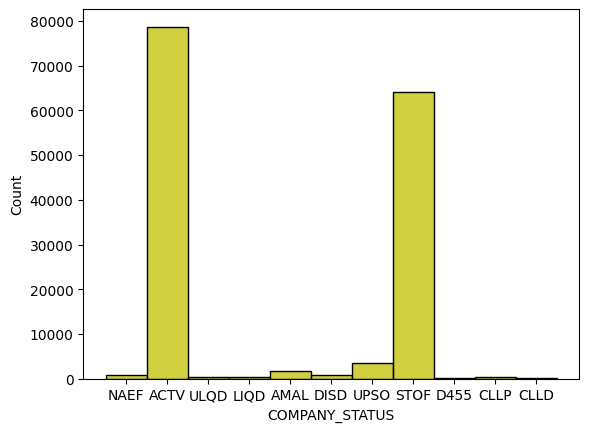

In [8]:
sns.histplot(dataset, x='COMPANY_STATUS', bins=25, color='y')

<Axes: xlabel='REGISTRAR_OF_COMPANIES', ylabel='Count'>

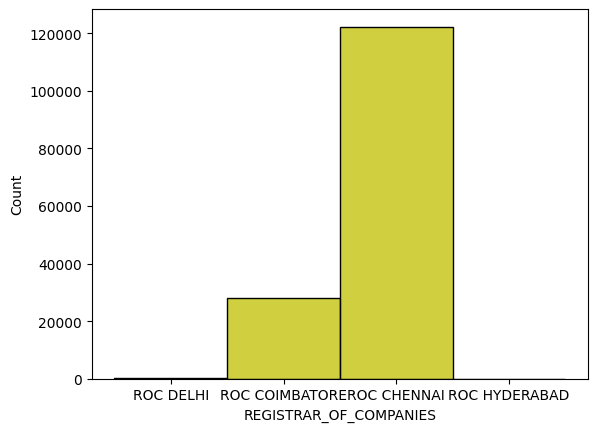

In [9]:
sns.histplot(dataset, x='REGISTRAR_OF_COMPANIES', bins=50, color='y')

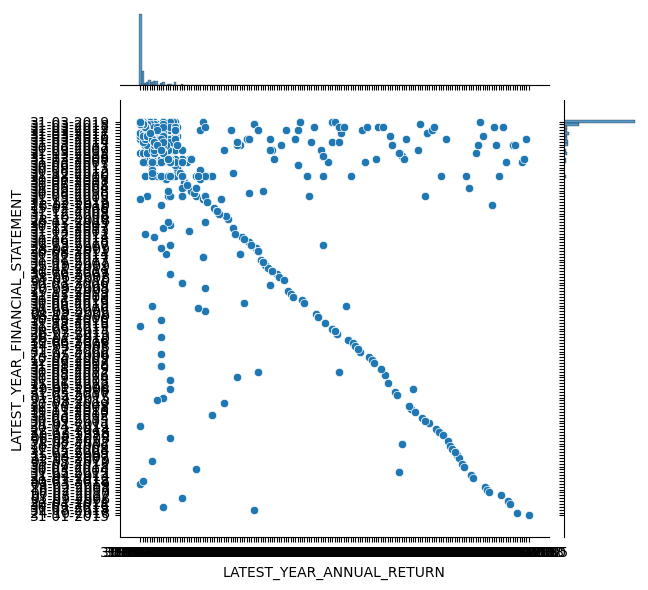

In [10]:
sns.jointplot(dataset, x='LATEST_YEAR_ANNUAL_RETURN', y='LATEST_YEAR_FINANCIAL_STATEMENT')

<Figure size 1200x800 with 0 Axes>

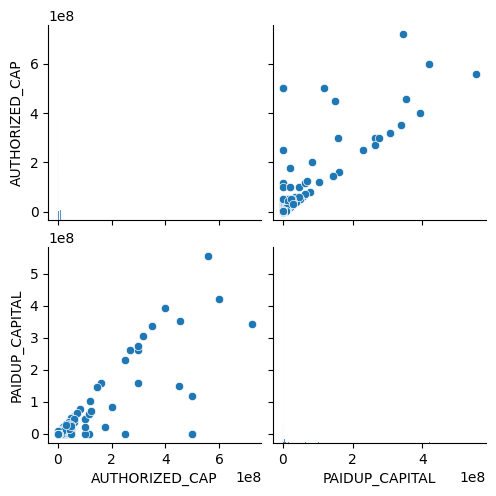

In [11]:
dataset_sample = dataset.sample(n=1000)  # Adjust the number of samples as needed
plt.figure(figsize=(12, 8))
sns.pairplot(dataset_sample)
plt.show()


array([[<Axes: title={'center': 'AUTHORIZED_CAP'}>,
        <Axes: title={'center': 'PAIDUP_CAPITAL'}>]], dtype=object)

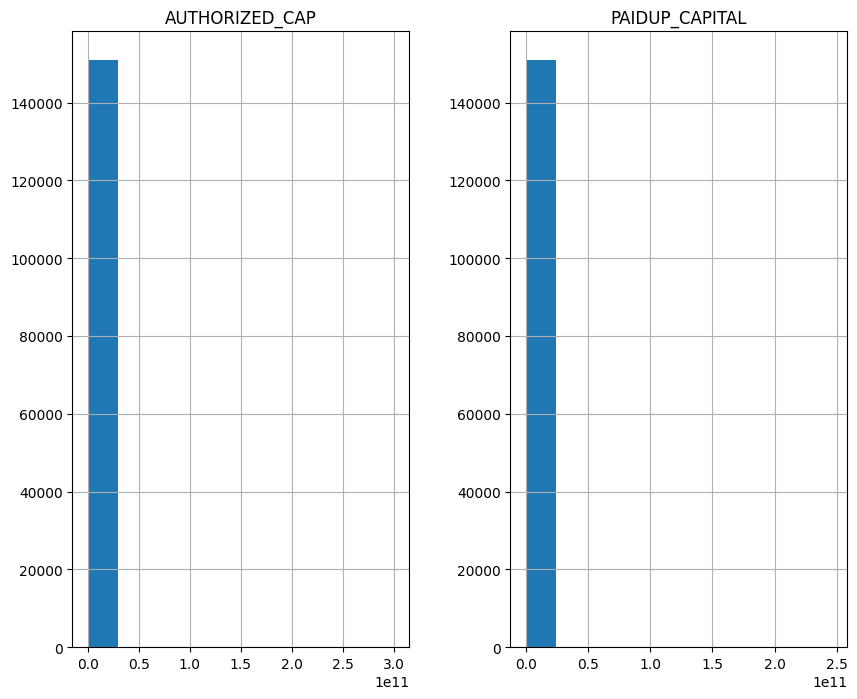

In [12]:
dataset.hist(figsize=(10,8))

In [13]:
dataset.corr()

<ipython-input-13-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,AUTHORIZED_CAP,PAIDUP_CAPITAL
AUTHORIZED_CAP,1.000000,0.971255
PAIDUP_CAPITAL,0.971255,1.000000


<ipython-input-14-1afac6b5cf53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

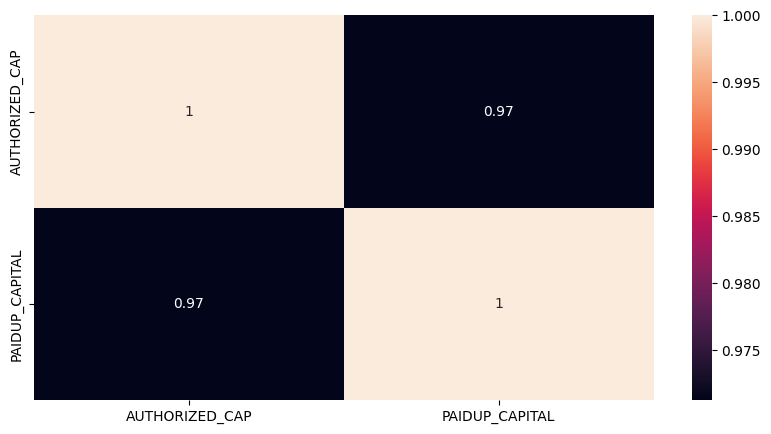

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)

In [21]:
import os

In [24]:
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv' , encoding='ISO-8859-1')

<ipython-input-24-67b3482a124f>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv' , encoding='ISO-8859-1')


In [25]:
print(data.head())
print(data.info())
print(data.describe())

  CORPORATE_IDENTIFICATION_NUMBER  \
0                          F00643   
1                          F00721   
2                          F00892   
3                          F01208   
4                          F01218   

                                        COMPANY_NAME COMPANY_STATUS  \
0                                   HOCHTIEFF AG,              NAEF   
1  SUMITOMO CORPORATION (SUMITOMO SHOJI KAISHA LI...           ACTV   
2                      SRILANKAN AIRLINES LIMITED              ACTV   
3                            CALTEX INDIA LIMITED              NAEF   
4              GE HEALTHCARE BIO-SCIENCES LIMITED              ACTV   

  COMPANY_CLASS COMPANY_CATEGORY COMPANY_SUB_CATEGORY DATE_OF_REGISTRATION  \
0           NaN              NaN                  NaN           01-12-1961   
1           NaN              NaN                  NaN                  NaN   
2           NaN              NaN                  NaN           01-03-1982   
3           NaN              NaN      

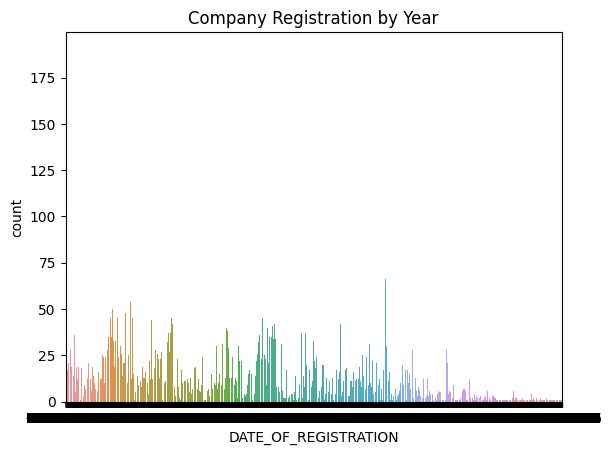

In [26]:
sns.countplot(x='DATE_OF_REGISTRATION', data=data)
plt.title('Company Registration by Year')
plt.show()

<ipython-input-27-819a93f6da46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


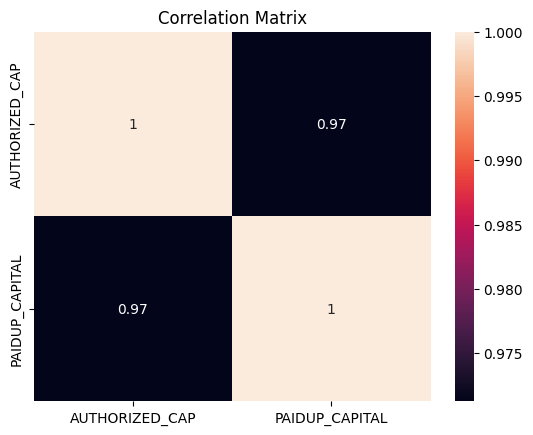

In [27]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

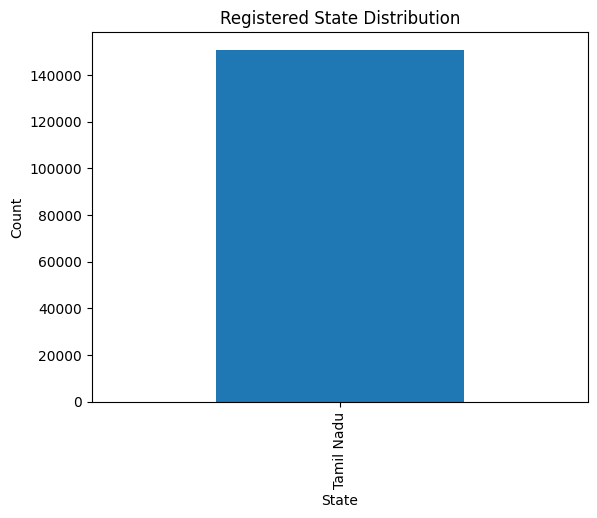

In [28]:
data['REGISTERED_STATE'].value_counts().plot(kind='bar')
plt.title('Registered State Distribution')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [29]:
data['AUTHORIZED_CAP'] = pd.to_numeric(data['AUTHORIZED_CAP'], errors='coerce')

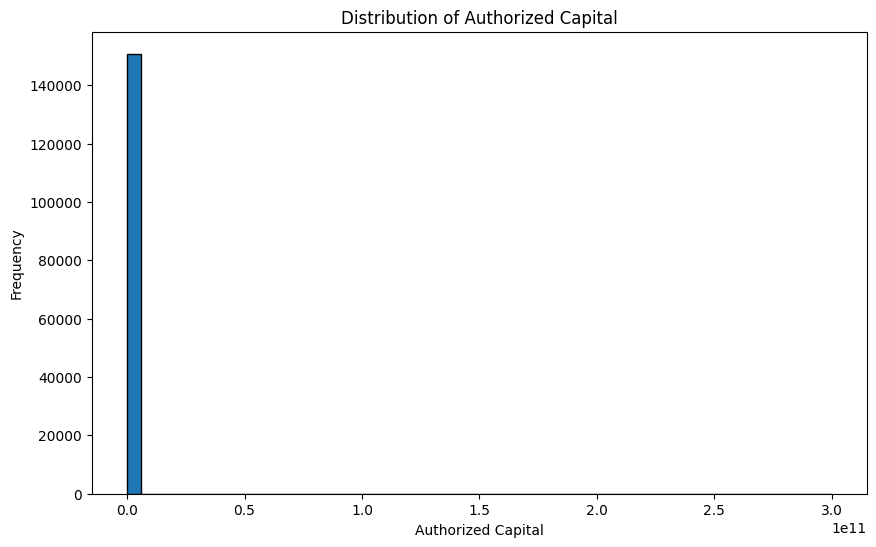

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(data['AUTHORIZED_CAP'], bins=50, edgecolor='k')
plt.title('Distribution of Authorized Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Frequency')
plt.show()

In [31]:
predicted_values = [0.2, 0.4, 0.6, 0.8, 0.9, 0.7, 0.5, 0.3, 0.1]

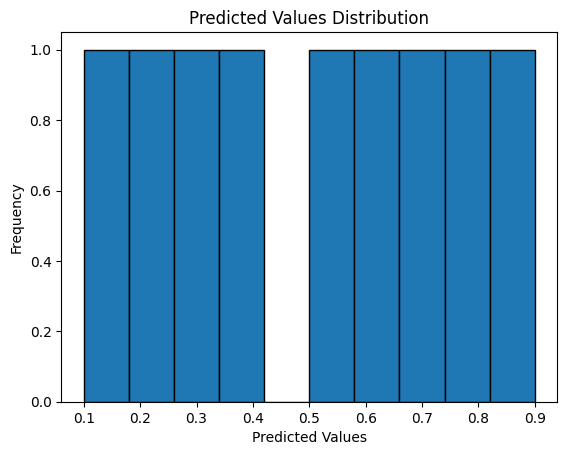

In [32]:
plt.hist(predicted_values, bins=10, edgecolor='k')
plt.title('Predicted Values Distribution')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.show()